In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [82]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [83]:
df.shape

(70000, 13)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [85]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [86]:
# transforming age from days to year
df['age'] = (df['age']/365).round().astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


## Handling Outliers

30
65


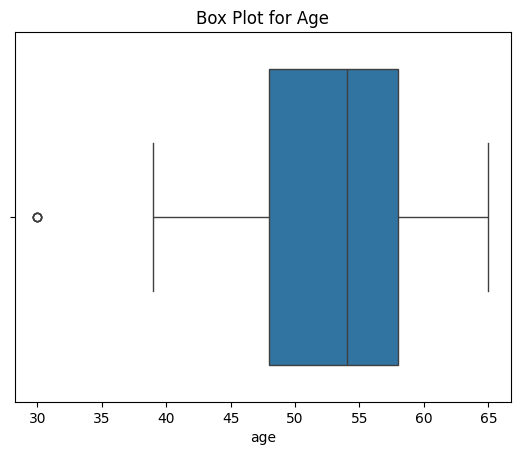

In [87]:
print(df['age'].min())
print(df['age'].max())

sns.boxplot(x=df['age'])
plt.title("Box Plot for Age")
plt.show()

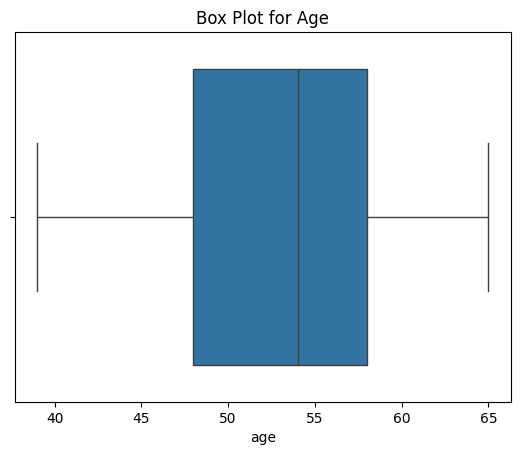

65 39


In [88]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

sns.boxplot(x=df['age'])
plt.title("Box Plot for Age")
plt.show()

print(df['age'].max(), df['age'].min())

55
250


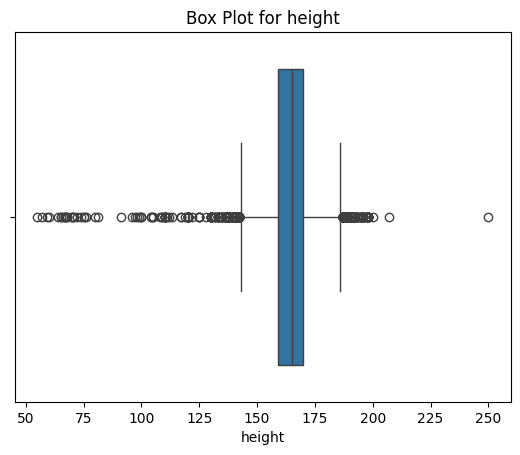

In [89]:
print(df['height'].min())
print(df['height'].max())

sns.boxplot(x=df['height'])
plt.title("Box Plot for height")
plt.show()

142.5 186.5


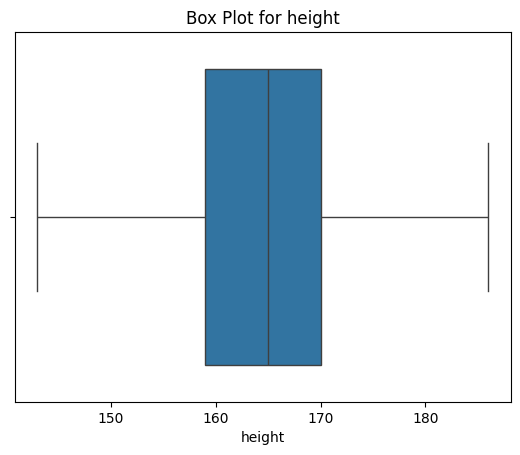

186 143


In [90]:
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

df = df[(df['height'] > lower_bound) & (df['height'] < upper_bound)]

sns.boxplot(x=df['height'])
plt.title("Box Plot for height")
plt.show()

print(df['height'].max(), df['height'].min())

10.0
200.0


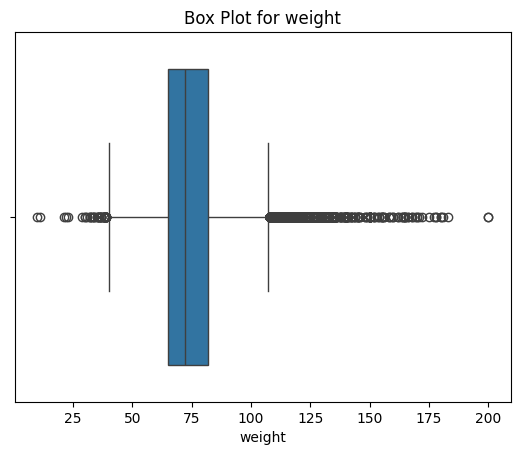

In [91]:
print(df['weight'].min())
print(df['weight'].max())

sns.boxplot(x=df['weight'])
plt.title("Box Plot for weight")
plt.show()

39.5 107.5


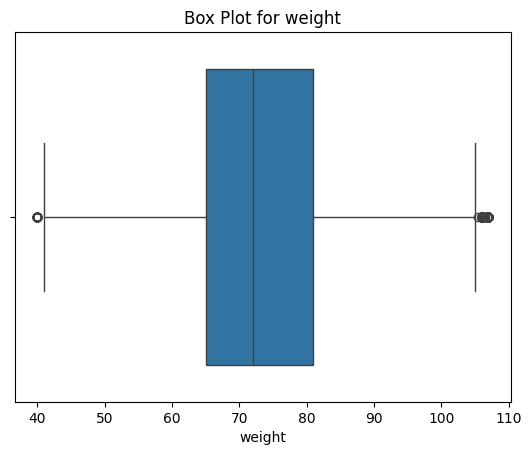

40.0 107.0


In [92]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

df = df[(df['weight'] > lower_bound) & (df['weight'] < upper_bound)]

sns.boxplot(x=df['weight'])
plt.title("Box Plot for weight")
plt.show()

print(df['weight'].min(), df['weight'].max())

-150 16020


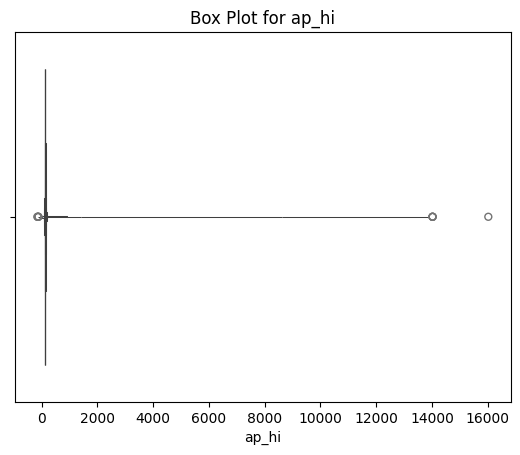

In [93]:
print(df['ap_hi'].min(), df['ap_hi'].max())

sns.boxenplot(x=df['ap_hi'])
plt.title("Box Plot for ap_hi")
plt.show()

prev = df.shape

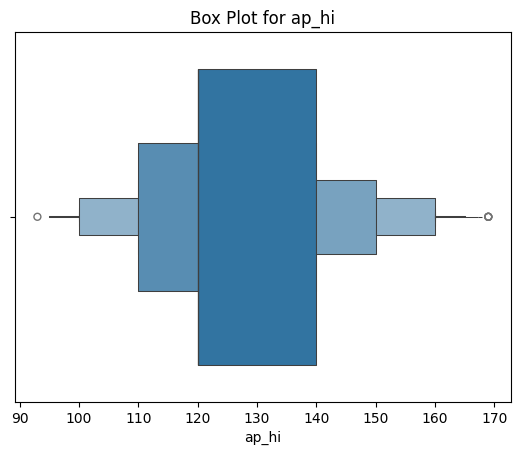

93 169
2916


In [94]:
Q1 = df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ap_hi'] > lower_bound) & (df['ap_hi'] < upper_bound)]

sns.boxenplot(x=df['ap_hi'])
plt.title("Box Plot for ap_hi")
plt.show()

print(df['ap_hi'].min(), df['ap_hi'].max())
print(prev[0] - df.shape[0])


0 10000


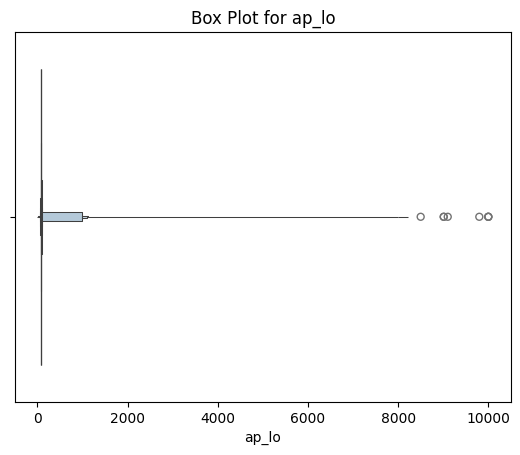

In [95]:
print(df['ap_lo'].min(), df['ap_lo'].max())

sns.boxenplot(x=df['ap_lo'])
plt.title("Box Plot for ap_lo")
plt.show()

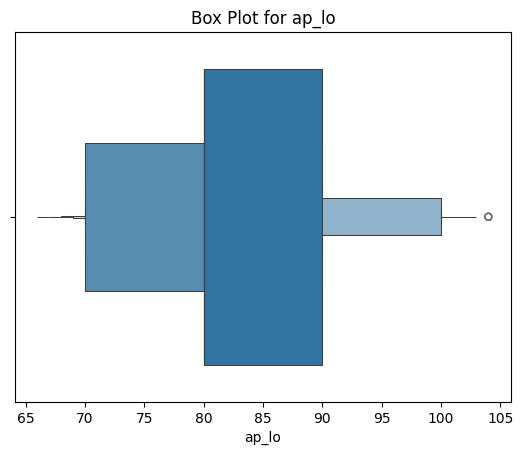

66 104


In [96]:
Q1 = df['ap_lo'].quantile(0.25)
Q3 = df['ap_lo'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ap_lo'] > lower_bound) & (df['ap_lo'] < upper_bound)]
sns.boxenplot(x=df['ap_lo'])
plt.title("Box Plot for ap_lo")
plt.show()

print(df['ap_lo'].min(), df['ap_lo'].max())

In [97]:
print(df['gender'].unique())
print(df['cholesterol'].unique())
print(df['gluc'].unique())
print(df['smoke'].unique())
print(df['alco'].unique())
print(df['cardio'].unique())

[2 1]
[1 3 2]
[1 2 3]
[0 1]
[0 1]
[0 1]


## Normalizing

In [98]:
cols_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.504379,2,0.475450,-0.911169,-1.181826,-0.218227,1,1,0,0,1,0
1,1,0.237706,1,-1.118959,0.966854,1.009150,1.103429,3,1,0,0,1,1
2,2,-0.207545,1,0.076848,-0.747862,0.278824,-1.539883,3,1,0,0,0,1
3,3,-0.801213,2,0.608317,0.721895,1.739475,2.425086,1,1,0,0,1,1
5,8,0.979790,1,-1.783296,-0.502903,-0.451501,-0.218227,2,2,0,0,0,0


## Visualization And Removing Non related columns

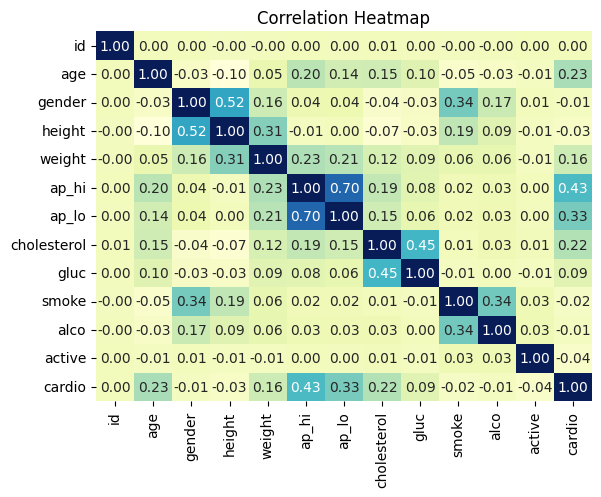

In [99]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu',cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [100]:
df = df.drop(['gender', 'height'], axis=1)
df.head()

,id,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.504379,-0.911169,-1.181826,-0.218227,1,1,0,0,1,0
1,1,0.237706,0.966854,1.009150,1.103429,3,1,0,0,1,1
2,2,-0.207545,-0.747862,0.278824,-1.539883,3,1,0,0,0,1
3,3,-0.801213,0.721895,1.739475,2.425086,1,1,0,0,1,1
5,8,0.979790,-0.502903,-0.451501,-0.218227,2,2,0,0,0,0


In [101]:
from sklearn.preprocessing import StandardScaler

# Use
df.to_csv('cleaned_cardio.csv', index=False)